<h1 align = "center"> Lab-15 : Quantum Neural Networks(QNNs)</h1>

> Quantum Machine Learning(QML) workflows can be demonstrated using different quantum neural network implemented using `qiskit-machine-learning`.





> QNNs in `qiskit-machine-learning` - Application-agnostic computational units. The module contains an interface for the QNNs and two specific implementations:

1. [NeuralNetwork](https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.neural_networks.NeuralNetwork.html): The interface for neural networks. This is an abstract class all QNNs inherit from.
   - [EstimatorQNN](https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.neural_networks.EstimatorQNN.html): A network based on the evaluation of quantum mechanical observables.
   - [SamplerQNN](https://qiskit.org/ecosystem/machine-learning/locale/fr_FR/stubs/qiskit_machine_learning.neural_networks.SamplerQNN.html): A network based on the samples resulting from measuring a quantum circuit.

> [qiskit primitives](https://qiskit.org/documentation/apidoc/primitives.html). The primitives are the entry point to run QNNs on either a simulator or real quantum hardware. Each implementation, `EstimatorQNN` and `SamplerQNN`, takes in an optional instance of its corresponding primitive, which can be any subclass of `BaseEstimator` and `BaseSampler`, respectively. The `NeuralNetwork` class is the interface for all QNNs available in `qiskit-machine-learning`. It exposes a forward and a backward pass that take data samples and trainable weights as input.



In [1]:
# set the algorithmic seed to ensure that the results don't change between runs
from qiskit.utils import algorithm_globals
# Quantum Circuit's Parameter Object
from qiskit.circuit import Parameter, ParameterVector
# Quantum Circuit
from qiskit import QuantumCircuit
# 
from qiskit.quantum_info import SparsePauliOp
#
#from qiskit_machine_learning.neural_networks import EstimatorQNN

## 'QNNs Forward Run'
### `1.1 EstimatorQNN`

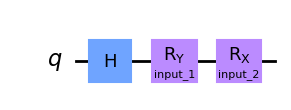

In [2]:
algorithm_globals.random_seed = 42

params = [Parameter("input_1"), Parameter("input_2")]
qc_1 = QuantumCircuit(1)
qc_1.h(0)
qc_1.ry(params[0], 0)
qc_1.rx(params[1], 0)
qc_1.draw(output="mpl")

In [3]:
observable = SparsePauliOp.from_list([("Y" * qc_1.num_qubits, 1)])
observable

SparsePauliOp(['Y'],
              coeffs=[1.+0.j])

In [ ]:
estimator_qnn = EstimatorQNN(
    circuit=qc_1, observables=observable, input_params=[params[0]], weight_params=[params[1]]
)
estimator_qnn

### Run a Forward Pass to Neural Networks

In [ ]:
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

In [ ]:
print(
    f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input}"
)
print(
    f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nWeights: {estimator_qnn_weights}"
)

Non-batched Forward Pass

In [ ]:
estimator_qnn_forward = estimator_qnn.forward(estimator_qnn_input, estimator_qnn_weights)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}"
)

Batched Forward Pass

In [ ]:
estimator_qnn_forward_batched = estimator_qnn.forward(
    [estimator_qnn_input, estimator_qnn_input], estimator_qnn_weights
)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}.  \nShape: {estimator_qnn_forward_batched.shape}"
)

## 'QNN Backward Pass'

### Backward Pass without Input Gradients

In [ ]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

### Backward Pass with Input Gradients

In [ ]:
estimator_qnn.input_gradients = True

In [ ]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

## Let's Build the Architechture for countable number of observables


In [ ]:
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

estimator_qnn2 = EstimatorQNN(
    circuit=qc1,
    observables=[observable1, observable2],
    input_params=[params1[0]],
    weight_params=[params1[1]],
)

In [ ]:
estimator_qnn_forward2 = estimator_qnn2.forward(estimator_qnn_input, estimator_qnn_weights)
estimator_qnn_input_grad2, estimator_qnn_weight_grad2 = estimator_qnn2.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(f"Forward output for EstimatorQNN1: {estimator_qnn_forward.shape}")
print(f"Forward output for EstimatorQNN2: {estimator_qnn_forward2.shape}")
print(f"Backward output for EstimatorQNN1: {estimator_qnn_weight_grad.shape}")
print(f"Backward output for EstimatorQNN2: {estimator_qnn_weight_grad2.shape}")

## Conclusion


## `Reference and learning source : Qiskit Textbook Online`